In [ ]:
!pip install pymatgen pandas matplotlib seaborn
import pandas as pd
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
import seaborn as sns
my_API = 'Your_API'
with MPRester(my_API) as mpr:
    docs = mpr.summary.search(num_elements=2, exclude_elements =  ["Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr", "Rf", "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og"],
                              is_stable = True,
                     fields=["material_id", "band_gap", "formation_energy_per_atom", "density_atomic", "formula_pretty"])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 30.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/5149 [00:00<?, ?it/s]

In [ ]:
df = pd.read_csv("periodic_table_final.csv")
df.head()

,Unnamed: 0,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,...,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes
0,0,1.0,Hydrogen,H,1.007,0.0,1.0,1.0,1.0,1.0,...,yes,NaN,Nonmetal,0.79,2.20,13.5984,0.000090,14.175,20.28,3.0
1,1,2.0,Helium,He,4.002,2.0,2.0,2.0,1.0,18.0,...,yes,NaN,Noble Gas,0.49,0.00,24.5874,0.000179,0.950,4.22,5.0
2,2,3.0,Lithium,Li,6.941,4.0,3.0,3.0,2.0,1.0,...,NaN,NaN,Alkali Metal,2.10,0.98,5.3917,0.534000,453.850,1615.00,5.0
3,3,4.0,Beryllium,Be,9.012,5.0,4.0,4.0,2.0,2.0,...,NaN,NaN,Alkaline Earth Metal,1.40,1.57,9.3227,1.850000,1560.150,2742.00,6.0
4,4,5.0,Boron,B,10.811,6.0,5.0,5.0,2.0,13.0,...,NaN,yes,Metalloid,1.20,2.04,8.2980,2.340000,2573.150,4200.00,6.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'AtomicNumber', 'Element', 'Symbol', 'AtomicMass',
       'NumberofNeutrons', 'NumberofProtons', 'NumberofElectrons', 'Period',
       'Group', 'Phase', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes'],
      dtype='object')

In [ ]:
formula = [doc.formula_pretty for doc in docs]
len(formula)
print(formula)

['Mg149Tc', 'K5As4', 'CuS2', 'Sm14Ag51', 'GdB6', 'Th2C3', 'YIr', 'TmSe2', 'ZrCr2', 'CaCu5', 'NdOs2', 'Ho2S3', 'NiCl2', 'SnRh', 'Zr7Pt10', 'Nd5Co2', 'Ac2O3', 'Er13Zn58', 'Au3F8', 'EuMg2', 'P4S3', 'Tm3Ru', 'GdSe2', 'Tl7Sb2', 'Ho2In', 'TaSi2', 'Ti2O', 'La5Ru2', 'Dy13Zn58', 'Zn3N2', 'In4Te3', 'TaAs', 'EuPb', 'BeH2', 'ZrSe2', 'SmH2', 'Ag3Pd', 'Tb11Sn10', 'Ti2Pd', 'Yb3Ge8', 'Li17Sn4', 'EuHg3', 'Ca5Au3', 'Sr3P4', 'Mg149In', 'NaCl7', 'Nb3B4', 'PtPb4', 'U3Sb4', 'TbBr3', 'BaF3', 'Yb5Pt3', 'Sb2Os', 'Th2Se3', 'PrSe2', 'Nb5Sb4', 'TeI', 'Nb2Pd', 'Tb2Co17', 'Ho2C', 'Rb4Ge23', 'TbZn2', 'HoHg3', 'GaBr3', 'BaMg', 'RbI', 'Tm3Ir', 'Zr3In', 'CrRh3', 'TmB2', 'Pr5Bi3', 'Dy3Ga5', 'DyRe2', 'Ba3N', 'Tm5Rh3', 'Cd41Ir8', 'CoSb', 'Pa3Te', 'Ca5Si3', 'Y2Se3', 'CsGa3', 'FePt3', 'Mo5As4', 'Ag3Sb', 'Lu2Se3', 'Nb2B3', 'ZrRh3', 'Yb2Ni7', 'BaZn2', 'PmHg3', 'In2O3', 'Tm11Cd45', 'TbIr2', 'Nd5Rh4', 'CrPt3', 'AlV3', 'PrMg', 'Zr2Al3', 'GaCo', 'MgTl', 'Li3Cd', 'Dy3Rh2', 'Cs3P7', 'La7Ru3', 'PrTl', 'Tl2O', 'Tc2As3', 'EuS2', 'Yb5A

In [ ]:
# Initialize an empty dictionary where each key is a column name and each value is an empty list
D={'density_atomic':[], 'band_gap':[], 'formation_energy_per_atom':[], 'material_id':[], 'formula':[]}

# Iterate over the 'docs' list (which presumably contains document objects)
for doc in docs:
    # For each document, append the relevant attributes to the corresponding lists in the dictionary
    D['density_atomic'].append(doc.density_atomic)
    D['formation_energy_per_atom'].append(doc.formation_energy_per_atom)
    D['band_gap'].append(doc.band_gap)
    D['material_id'].append(doc.material_id)
    D['formula'].append(doc.formula_pretty)

# Convert the dictionary to a pandas DataFrame
mp_query = pd.DataFrame(D)

# Convert the 'formula' column to string type, then call the 'unique' method to get all unique formulas
mp_query["formula"].astype("string").unique()


<StringArray>
[ 'Mg149Tc',    'K5As4',     'CuS2', 'Sm14Ag51',     'GdB6',    'Th2C3',
      'YIr',    'TmSe2',    'ZrCr2',    'CaCu5',
 ...
    'NdSn2',     'DySi',     'ErHg',   'DyMn12',    'Sc2Te',    'LiPd3',
    'CaAs3',    'NdNi5',    'LaTl3',   'K3As11']
Length: 5149, dtype: string

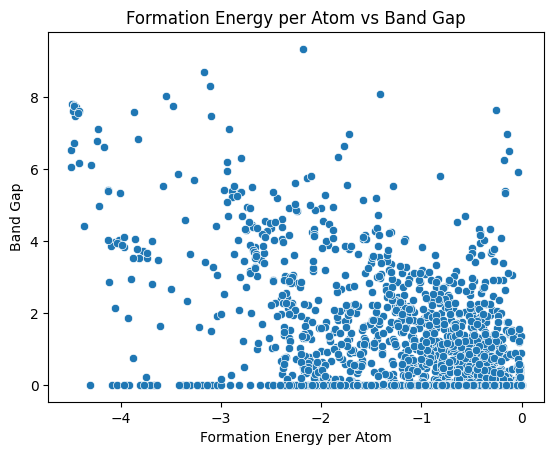

In [ ]:
# Import the necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot using Seaborn's scatterplot function
# 'formation_energy_per_atom' is on the x-axis and 'band_gap' is on the y-axis
# The data is sourced from the 'mp_query' DataFrame
sns.scatterplot(x = 'formation_energy_per_atom', y = 'band_gap', data = mp_query)

# Set the title of the scatter plot
plt.title('Formation Energy per Atom vs Band Gap')

# Set the label for the x-axis
plt.xlabel('Formation Energy per Atom')

# Set the label for the y-axis
plt.ylabel('Band Gap')

# Display the plot
plt.show()


In [ ]:
# Extract all the elements from the 'formula' column of the mp_query DataFrame
elements = mp_query['formula'].str.extractall(r'([A-Z][a-z]*)').reset_index()
# Rename the columns of the 'elements' DataFrame
elements.columns = ['material_id', 'match', 'Symbol']

# Merge 'elements' DataFrame with the 'df' DataFrame based on the 'Symbol' column
merged = pd.merge(elements, df, left_on='Symbol', right_on='Symbol')

# Create new columns in the mp_query DataFrame to store the sum of metals, nonmetals and metalloids,
# and the average atomic radius and electronegativity for each material_id
mp_query['num_metals'] = merged.groupby('material_id')['Metal'].sum()
mp_query['num_nonmetals'] = merged.groupby('material_id')['Nonmetal'].sum()
mp_query['num_metalloids'] = merged.groupby('material_id')['Metalloid'].sum()
mp_query['average_atomic_radius'] = merged.groupby('material_id')['AtomicRadius'].mean()
mp_query['average_electronegativity'] = merged.groupby('material_id')['Electronegativity'].mean()

# Convert the metal, nonmetal, and metalloid columns to numeric, and handle any errors by replacing them with NaN
mp_query['num_metals'] = pd.to_numeric(mp_query['num_metals'], errors='coerce')
mp_query['num_nonmetals'] = pd.to_numeric(mp_query['num_nonmetals'], errors='coerce')
mp_query['num_metalloids'] = pd.to_numeric(mp_query['num_metalloids'], errors='coerce')

# Fill any NaN values in the metal, nonmetal, and metalloid columns with 0
mp_query['num_metals'].fillna(0, inplace=True)
mp_query['num_nonmetals'].fillna(0, inplace=True)
mp_query['num_metalloids'].fillna(0, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = mp_query[['num_metals', 'num_nonmetals', 'num_metalloids', 'average_atomic_radius', 'average_electronegativity']]
for target in ['formation_energy_per_atom', 'band_gap']:
    y = mp_query[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error for {target}:', mse)# Import necessary modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature matrix X using selected columns from mp_query DataFrame
X = mp_query[['num_metals', 'num_nonmetals', 'num_metalloids', 'average_atomic_radius', 'average_electronegativity']]

# Loop through two targets: 'formation_energy_per_atom' and 'band_gap'
for target in ['formation_energy_per_atom', 'band_gap']:
    # Define the target vector y using the current target column from mp_query DataFrame
    y = mp_query[target]

    # Split the data into training set and test set, with 20% of the data being used as the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize a Linear Regression model
    model = LinearRegression()

    # Train the model using the training set
    model.fit(X_train, y_train)

    # Make predictions using the test set
    predictions = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) of the predictions
    mse = mean_squared_error(y_test, predictions)

    # Print the MSE for the current target
    print(f'Mean Squared Error for {target}:', mse)


Mean Squared Error for formation_energy_per_atom: 0.4040325421494253
Mean Squared Error for band_gap: 0.9536760634960799
Mean Squared Error for formation_energy_per_atom: 0.4040325421494253
Mean Squared Error for band_gap: 0.9536760634960799


In [ ]:
df.set_index("Symbol", inplace=True)
df.loc["O"]["AtomicRadius"]

0.65

In [ ]:
from pymatgen.core import Composition
comp = Composition('FeO2')
comp.elements
comp.get_atomic_fraction('O')

0.6666666666666666

In [ ]:
# Loop through all the chemical formulas in the 'formula' column of mp_query DataFrame
for formula in mp_query['formula']:
    # Create a Composition object from the chemical formula
    comp = Composition(formula)

    # Initialize average property values
    avg_atomic_radius = 0
    avg_electronegativity = 0
    avg_first_ionization = 0
    avg_density = 0
    avg_melting_point = 0
    avg_boiling_point = 0
    avg_number_of_isotopes = 0

    # Loop through all the elements in the composition
    for element in comp:
        # Get the property values for the current element from the DataFrame df
        atomic_radius = df.loc[str(element), 'AtomicRadius']
        electronegativity = df.loc[str(element), 'Electronegativity']
        first_ionization = df.loc[str(element), 'FirstIonization']
        density = df.loc[str(element), 'Density']
        melting_point = df.loc[str(element), 'MeltingPoint']
        boiling_point = df.loc[str(element), 'BoilingPoint']
        number_of_isotopes = df.loc[str(element), 'NumberOfIsotopes']

        # Get the atomic fraction of the current element in the composition
        fraction = comp.get_atomic_fraction(str(element))

        # Compute the weighted averages of the properties
        avg_atomic_radius += atomic_radius * fraction
        avg_electronegativity += electronegativity * fraction
        avg_first_ionization += first_ionization * fraction
        avg_density += density * fraction
        avg_melting_point += melting_point * fraction
        avg_boiling_point += boiling_point * fraction
        avg_number_of_isotopes += number_of_isotopes * fraction

    # Store the computed average properties in the mp_query DataFrame
    mp_query.loc[mp_query['formula'] == formula, 'AtomicRadius'] = avg_atomic_radius
    mp_query.loc[mp_query['formula'] == formula, 'Electronegativity'] = avg_electronegativity
    mp_query.loc[mp_query['formula'] == formula, 'FirstIonization'] = avg_first_ionization
    mp_query.loc[mp_query['formula'] == formula, 'Density'] = avg_density
    mp_query.loc[mp_query['formula'] == formula, 'MeltingPoint'] = avg_melting_point
    mp_query.loc[mp_query['formula'] == formula, 'BoilingPoint'] = avg_boiling_point
    mp_query.loc[mp_query['formula'] == formula, 'NumberOfIsotopes'] = avg_number_of_isotopes

# Define a list of properties
properties = ['AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density', 'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes']

# Initialize the properties in mp_query DataFrame to 0
for prop in properties:
    mp_query[prop] = 0

# Loop through all the rows in the mp_query DataFrame
for i, row in mp_query.iterrows():
    # Get the formula for the current row
    formula = row['formula']
    # Create a Composition object from the formula
    comp = Composition(formula)

    # Loop through all the properties
    for prop in properties:
        # Initialize the weighted property to 0
        weighted_property = 0

        # Loop through all the elements in the composition
        for element in comp.elements:
            # Get the property value for the current element from the DataFrame df
            property_value = df.loc[str(element),prop]

            # Get the atomic fraction of the current element in the composition
            fraction = comp.get_atomic_fraction(str(element))
            # Compute the weighted property
            weighted_property += property_value * fraction

        # Store the computed weighted property in the mp_query DataFrame
        mp_query.loc[i, prop] = weighted_property


In [ ]:
#Let it easy to read features
mp_query.head()

,density_atomic,band_gap,formation_energy_per_atom,material_id,formula,num_metals,num_nonmetals,num_metalloids,average_atomic_radius,average_electronegativity,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes
0,22.877356,0.0978,-0.018674,mp-1185636,Mg149Tc,0.0,0.0,0.0,1.85,1.605,1.702000,1.313933,7.643759,1.805067,933.483333,1388.246667,8.100000
1,32.273652,0.0000,-0.437151,mp-1223503,K5As4,0.0,0.0,0.0,2.05,1.500,2.133333,1.424444,6.761989,3.047778,671.455556,967.555556,11.777778
2,16.316454,0.0000,-0.432674,mp-849086,CuS2,0.0,0.0,0.0,1.35,2.240,1.266667,2.353333,9.482133,4.366667,711.590000,1423.533333,10.333333
3,20.401661,0.0000,-0.246306,mp-1219378,Sm14Ag51,0.0,0.0,0.0,2.20,1.550,1.972308,1.766308,7.159969,9.858154,1258.057692,2355.738462,24.846154
4,9.856148,0.0000,-0.456620,mp-22266,GdB6,0.0,0.0,0.0,1.85,1.620,1.385714,1.920000,7.991157,3.134286,2432.007143,4106.571429,7.571429


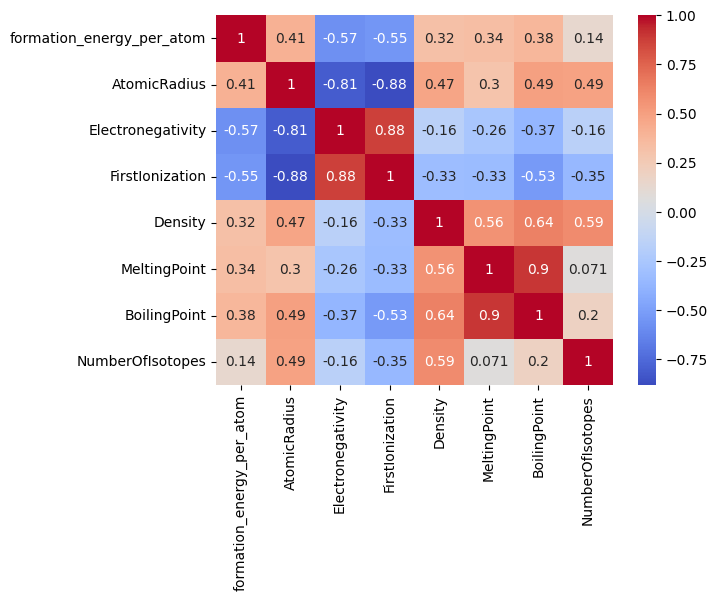

In [ ]:
# Import seaborn library for data visualization
import seaborn as sns

# Create a subset of mp_query dataframe, including only the columns you're interested in
mp_query_subset = mp_query[["formation_energy_per_atom","AtomicRadius", "Electronegativity", "FirstIonization", "Density", "MeltingPoint", "BoilingPoint", "NumberOfIsotopes"]]

# Use seaborn's heatmap function to visualize the correlation matrix of the subset dataframe
# "annot=True" means that the correlation coefficients are written on the heatmap
# "cmap='coolwarm'" sets the color map of the heatmap to 'coolwarm'
sns.heatmap(mp_query_subset.corr(), annot=True, cmap="coolwarm")

# Display the heatmap
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define features and target variable
X = mp_query[['AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density', 'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes']]
y = mp_query['formation_energy_per_atom']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
Linear_model = LinearRegression()

# Fit the training data to the model
Linear_model.fit(X_train, y_train)

# Make predictions on the test set using the trained model
predictions = Linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE) of the model's predictions
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)

# Calculate R-squared (R2 Score) of the model's predictions
r2 = r2_score(y_test, predictions)
print('R2 Score:', r2)

# Calculate Mean Absolute Error (MAE) of the model's predictions
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)


MSE: 0.2851886654278198
R2 Score: 0.4700940136305495
Mean Absolute Error: 0.380153852667404


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Copy the original DataFrame
mp_query_subset = mp_query.copy()

# Create a new column 'metallicity' based on the condition of 'band_gap' < 0.001
mp_query_subset['metallicity'] = np.where(mp_query_subset['band_gap'] < 0.001, 0, 1)

# Drop unnecessary columns from the DataFrame
mp_query_subset = mp_query_subset.drop(['material_id', 'formula', 'band_gap'], axis=1)

# Define features and target variable
X = mp_query_subset.drop('metallicity', axis=1)
y = mp_query_subset['metallicity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': range(1, 11),
    'max_depth': range(1, 8),
    'min_samples_split': range(2, 8)
}

# Initialize Grid Search with the classifier and the chosen parameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the data to Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print('Best Parameters: ', grid_search.best_params_)

# Define the best estimator found by Grid Search
best_clf = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf_tree = DecisionTreeClassifier(random_state=42)

# Fit the training data to the classifier
clf_tree.fit(X_train, y_train)

# Make predictions on the test set using the classifier
y_pred_tree = clf_tree.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_tree))


Best Parameters:  {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       768
           1       0.78      0.75      0.76       262

    accuracy                           0.88      1030
   macro avg       0.85      0.84      0.84      1030
weighted avg       0.88      0.88      0.88      1030

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       768
           1       0.74      0.75      0.74       262

    accuracy                           0.87      1030
   macro avg       0.83      0.83      0.83      1030
weighted avg       0.87      0.87      0.87      1030



In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select the features and the target variable for your model
X = mp_query_subset[['AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density', 'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes']]
y = mp_query_subset['metallicity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
Logistic_model = LogisticRegression()

# Train the model using the training data
Logistic_model.fit(X_train, y_train)

# Use the trained model to predict the target variable in the test data
y_pred = Logistic_model.predict(X_test)

# Calculate accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision of the model's predictions
precision = precision_score(y_test, y_pred)

# Calculate recall of the model's predictions
recall = recall_score(y_test, y_pred)

# Calculate F1 score of the model's predictions
f1 = f1_score(y_test, y_pred)

# Print the calculated metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.8601941747572815
Precision: 0.7657657657657657
Recall: 0.648854961832061
F1 Score: 0.7024793388429752


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


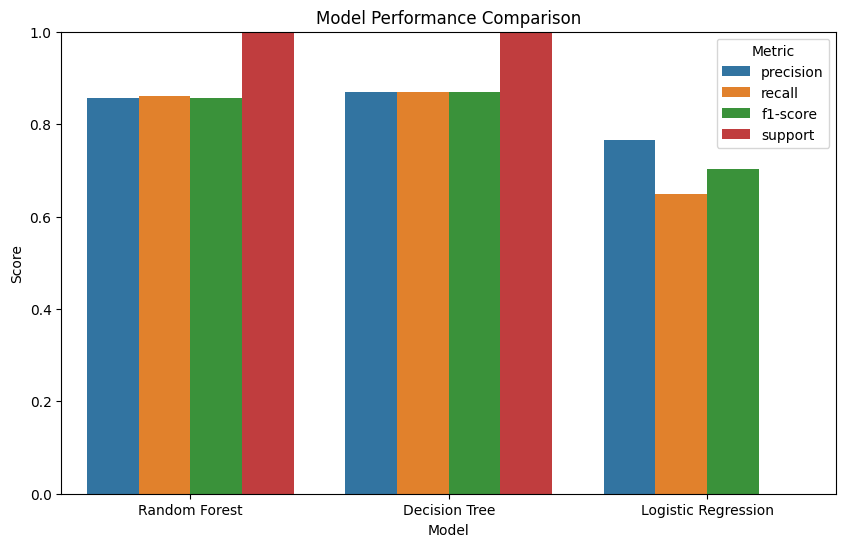

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Generate a classification report for the Random Forest model
rf_report = classification_report(y_test, y_pred, output_dict=True)
# Extract the weighted average metrics from the report
rf_metrics = rf_report['weighted avg']

# Generate a classification report for the Decision Tree model
dt_report = classification_report(y_test, y_pred_tree, output_dict=True)
# Extract the weighted average metrics from the report
dt_metrics = dt_report['weighted avg']

# Prepare metrics for the Logistic Regression model
log_metrics = {'precision': precision, 'recall': recall, 'f1-score': f1}

# Combine all metrics into a single dictionary for easier manipulation
metrics = {
    'Random Forest': rf_metrics,
    'Decision Tree': dt_metrics,
    'Logistic Regression': log_metrics
}

# Prepare a dictionary to hold the data that we want to plot
plot_data = {'Model': [], 'Metric': [], 'Score': []}
# Fill the dictionary with data from the metrics
for model, values in metrics.items():
    for metric, score in values.items():
        plot_data['Model'].append(model)
        plot_data['Metric'].append(metric)
        plot_data['Score'].append(score)

# Convert the dictionary to a DataFrame for easier plotting
df = pd.DataFrame(plot_data)

# Import seaborn for advanced plotting
import seaborn as sns

# Create a figure
plt.figure(figsize=(10, 6))

# Create a barplot with Model on the x-axis, Score on the y-axis, and Metric as hue
sns.barplot(x='Model', y='Score', hue='Metric', data=df)

# Set the y-axis limits to be between 0 and 1
plt.ylim([0.0, 1.0])

# Set the title of the plot
plt.title('Model Performance Comparison')

# Display the plot
plt.show()


The image above shows that the decision tree and random forest have almost the same performance to classify things.

In [ ]:
# Import necessary libraries and modules
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create an instance of Support Vector Regression (SVR)
svm_reg = SVR()

# Train the SVR model
svm_reg.fit(X_train, y_train)

# Use the trained SVR model to make predictions on the test data
svm_predictions = svm_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the SVR predictions
svm_mse = mean_squared_error(y_test, svm_predictions)

# Calculate the R-squared (R2) score of the SVR predictions
svm_r2 = r2_score(y_test, svm_predictions)

# Create an instance of Decision Tree Regressor
tree_reg = DecisionTreeRegressor()

# Train the Decision Tree model
tree_reg.fit(X_train, y_train)

# Use the trained Decision Tree model to make predictions on the test data
tree_predictions = tree_reg.predict(X_test)

# Calculate the MSE of the Decision Tree predictions
tree_mse = mean_squared_error(y_test, tree_predictions)

# Calculate the R2 score of the Decision Tree predictions
tree_r2 = r2_score(y_test, tree_predictions)

# Create an instance of Random Forest Regressor
rf_reg = RandomForestRegressor()

# Train the Random Forest model
rf_reg.fit(X_train, y_train)

# Use the trained Random Forest model to make predictions on the test data
rf_predictions = rf_reg.predict(X_test)

# Calculate the MSE of the Random Forest predictions
rf_mse = mean_squared_error(y_test, rf_predictions)

# Calculate the R2 score of the Random Forest predictions
rf_r2 = r2_score(y_test, rf_predictions)


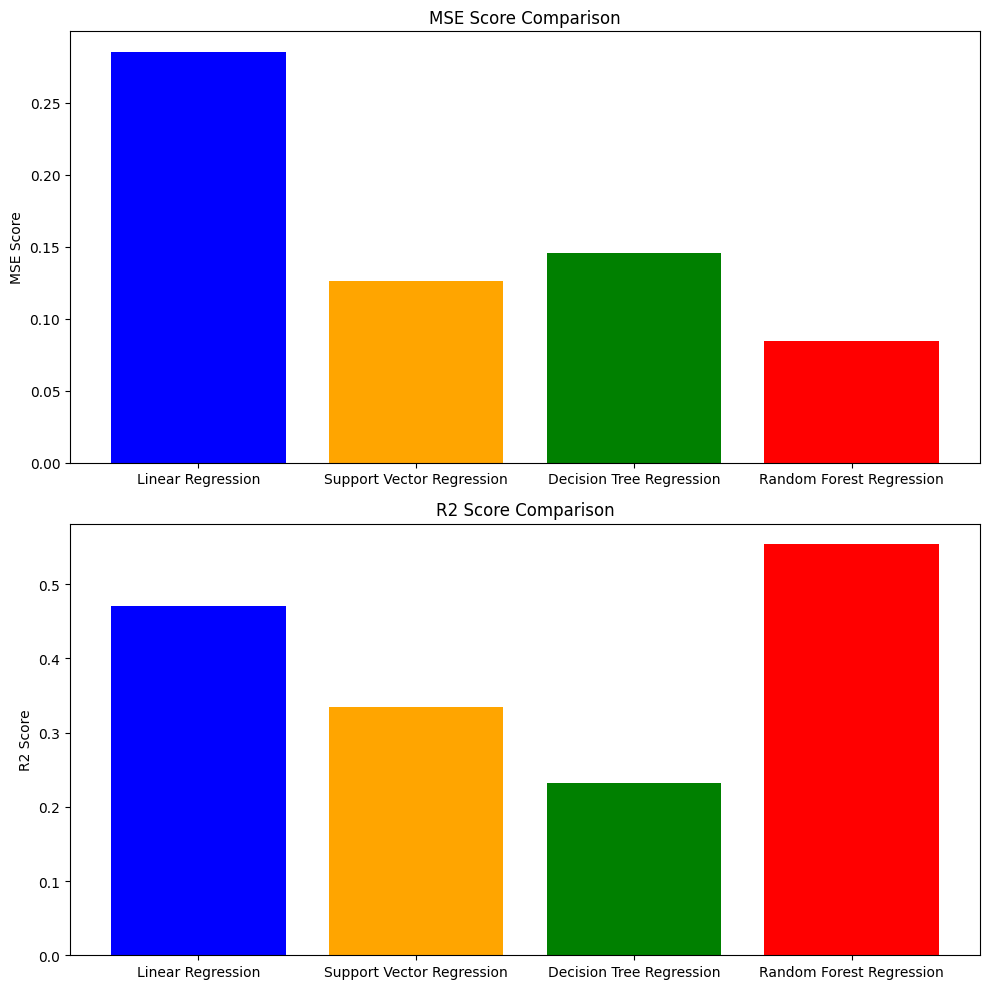

In [ ]:
# Import the matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Create a list of model names
models = ['Linear Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression']

# Create a list of Mean Squared Error (MSE) scores for each model
mse_scores = [mse, svm_mse, tree_mse, rf_mse]

# Create a list of R-squared (R2) scores for each model
r2_scores = [r2, svm_r2, tree_r2, rf_r2]

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 10))

# Create a bar chart on the first subplot (index 0) for the MSE scores
axs[0].bar(models, mse_scores, color=['blue', 'orange', 'green', 'red'])
axs[0].set_title('MSE Score Comparison')  # Set the title for the first subplot
axs[0].set_ylabel('MSE Score')  # Set the y-axis label for the first subplot

# Create a bar chart on the second subplot (index 1) for the R2 scores
axs[1].bar(models, r2_scores, color=['blue', 'orange', 'green', 'red'])
axs[1].set_title('R2 Score Comparison')  # Set the title for the second subplot
axs[1].set_ylabel('R2 Score')  # Set the y-axis label for the second subplot

# Adjust the padding between and around the subplots
fig.tight_layout()

# Display the figure
plt.show()


For the regression model, random forest has best ability to predict things, but linear regression can be more accuracy to have new value.

In [ ]:
#Linear Regression
importance_linear = Linear_model.coef_

for i, j in enumerate(importance_linear):
    print('Feature: %s, Score: %.5f' % (X.columns[i], j))


Feature: AtomicRadius, Score: -1.53046
Feature: Electronegativity, Score: -1.09343
Feature: FirstIonization, Score: -0.18705
Feature: Density, Score: 0.07626
Feature: MeltingPoint, Score: 0.00010
Feature: BoilingPoint, Score: -0.00008
Feature: NumberOfIsotopes, Score: -0.00262


In this module, Atomic Radius and Electronegativity have the greatest impact and MeltingPoint and BoilingPoint have the least impact.

In [ ]:
#Random Forest Classifier
importance_rfc = best_clf.feature_importances_
# Summarize feature importance
for i, j in enumerate(importance_rfc[:len(X.columns)]):
    print('Feature: %s, Score: %.5f' % (X.columns[i], j))


Feature: AtomicRadius, Score: 0.06093
Feature: Electronegativity, Score: 0.08859
Feature: FirstIonization, Score: 0.00000
Feature: Density, Score: 0.00000
Feature: MeltingPoint, Score: 0.00000
Feature: BoilingPoint, Score: 0.02766
Feature: NumberOfIsotopes, Score: 0.05992


In this module, NumberOfIsotopes and Electronegativity have the greatest impact and FirstIonization, Density and MeltingPoint have the least impact.

In [ ]:
#Decision Tree classifier
importance_dt = clf_tree.feature_importances_

# Summarize feature importance
for feature_name, score in zip(X.columns, importance_dt):
    print('Feature: %s, Score: %.5f' % (feature_name, score))



Feature: AtomicRadius, Score: 0.09014
Feature: Electronegativity, Score: 0.07967
Feature: FirstIonization, Score: 0.00000
Feature: Density, Score: 0.00000
Feature: MeltingPoint, Score: 0.00000
Feature: BoilingPoint, Score: 0.02199
Feature: NumberOfIsotopes, Score: 0.03076


In this module, AtomicRadius and Electronegativity have the greatest impact and FirstIonization, Density and MeltingPoint have the least impact.

In [ ]:
# Logistic_model
importance_Logistic = Logistic_model.coef_[0]

# Summarize feature importance
for i, j in enumerate(importance_Logistic):
    print('Feature: %s, Score: %.5f' % (X.columns[i], j))


Feature: AtomicRadius, Score: -0.58278
Feature: Electronegativity, Score: 0.99551
Feature: FirstIonization, Score: 0.01607
Feature: Density, Score: -0.45264
Feature: MeltingPoint, Score: 0.00080
Feature: BoilingPoint, Score: -0.00137
Feature: NumberOfIsotopes, Score: 0.13634


In this module, AtomicRadius and Electronegativity have the greatest impact and BoilingPoint and MeltingPoint have the least impact.

In [ ]:
# Decision tree regression
importance_tree = tree_reg.feature_importances_

# Summarize feature importance
for i, value in enumerate(importance_tree):
    print('Feature: %s, Score: %.5f' % (X.columns[i], value))


Feature: AtomicRadius, Score: 0.06491
Feature: Electronegativity, Score: 0.12092
Feature: FirstIonization, Score: 0.10657
Feature: Density, Score: 0.16608
Feature: MeltingPoint, Score: 0.05765
Feature: BoilingPoint, Score: 0.43203
Feature: NumberOfIsotopes, Score: 0.05185


In this module, BoilingPoint and Density have the greatest impact and AtomicRadius have the least impact.

In [ ]:
#Random forest regression
importance_rf = rf_reg.feature_importances_

# Summarize feature importance
for i, value in enumerate(importance_rf):
    print('Feature: %s, Score: %.5f' % (X.columns[i], value))


Feature: AtomicRadius, Score: 0.06571
Feature: Electronegativity, Score: 0.12441
Feature: FirstIonization, Score: 0.07864
Feature: Density, Score: 0.14989
Feature: MeltingPoint, Score: 0.07385
Feature: BoilingPoint, Score: 0.43764
Feature: NumberOfIsotopes, Score: 0.06986


In this module, BoilingPoint and Density have the greatest impact and NumberOfIsotopes has the least impact.

In [ ]:
# Install the eli5 library, which will be used for Permutation Importance
!pip install eli5

# Import the eli5 library
import eli5

# Import the PermutationImportance module from eli5
from eli5.sklearn import PermutationImportance

# Create a PermutationImportance object using the Support Vector Regressor model (svm_reg)
# The model has been trained, and now the permutation importance will be calculated on the test set (X_test, y_test)
# random_state=1 is set for reproducibility of the results
perm = PermutationImportance(svm_reg, random_state=1).fit(X_test, y_test)

# Show the weights of the PermutationImportance object
# The weights represent the importance of each feature in the model
# The feature names are taken from the columns of the test set dataframe
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=99da34e8a525ce7774c63b487dbbe288a2e31286b11ceee61d71f0f186f6dc36
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


Weight,Feature
0.6963 ± 0.0512,BoilingPoint
0.0237 ± 0.0219,MeltingPoint
0.0001 ± 0.0002,Density
0.0000 ± 0.0000,AtomicRadius
0.0000 ± 0.0000,Electronegativity
-0.0000 ± 0.0001,NumberOfIsotopes
-0.0000 ± 0.0000,FirstIonization


In this module, BoilingPoint and MeltingPoint have the greatest impact and Electronegativity, AtomicRadius, FirstIonization and	NumberOfIsotopes has the least impact.

***BoilingPoint***: The temperature at which a material turns from liquid to gas. Higher boiling points can indicate stronger intermolecular forces and higher thermal stability.

***MeltingPoint***: The temperature at which a material turns from solid to liquid. Higher melting points suggest stronger bonds and greater thermal stability.

***Density***: A measure of mass per unit volume. It can influence the hardness, strength, and sound/heat/electricity conduction of a material.

***Electronegativity***: A measure of an atom's ability to attract shared electrons. Higher electronegativity can lead to more polar bonds and impact the reactivity and bonding properties of a material.

***AtomicRadius***: The size of an atom. It can influence how closely atoms can pack together, which affects the material's density, bonding, and reactivity.

***FirstIonization***: The energy required to remove an electron from a neutral atom. It can influence the reactivity of a material and its ability to form positive ions.

***NumberOfIsotopes***: The number of different forms of an element, having the same number of protons but different numbers of neutrons. Different isotopes of the same element can exhibit slightly different physical properties.

***Linear Regression***:

Drawbacks: Assumes a linear relationship between features and output, which may not be the case in many real-world applications. Also, it may be greatly influenced by outliers.

Strategies: If the relationship is not linear, consider using polynomial regression or non-linear regression models. Also, make sure to preprocess the data to deal with outliers, if necessary.

***Logistic Regression***:

Drawbacks: Similar to linear regression, it assumes a linear decision boundary which is not always the case. Also, it can't handle a large number of categorical features well.

Strategies: Consider using non-linear models like Decision Trees or SVM with non-linear kernel if the decision boundary is not linear. Feature engineering can help handle categorical features.

***Support Vector Machines (SVM)***:

Drawbacks: Can be sensitive to the choice of the kernel parameters and the regularization parameter. It can be computationally intensive and slow for large datasets.

Strategies: Use grid search or similar methods to optimize the parameters. Consider using more efficient, linear models for very large datasets.

***Decision Trees***:

Drawbacks: They can easily overfit or underfit the data if not properly tuned, and small changes in the data can result in a different tree.

Strategies: Use ensemble methods like Random Forests or Gradient Boosting to average multiple decision trees and get more stable and robust predictions. Make sure to tune hyperparameters like maximum depth, and minimum samples split.

***Neural Networks***:

Drawbacks: Require a large amount of data to train effectively, and can be computationally intensive. They can also be difficult to interpret, and choosing the correct architecture can be complex.

Strategies: Use techniques like early stopping, dropout, or regularization to prevent overfitting. Try different architectures and use cross-validation to select the best one.

We can also add some new features to improve these models.

1.***Structural Information***: Knowing structure of the materials can be helpful to predict. The structure may include information about the symmetry of the material, the types and arrangement of structural units.

2.***Process Parameters***: The processing temperature, pressure, duration, or specific techniques used (like heat treatment or surface treatment) could all be important features.

3.***Composite Material Information***: knowing the proportions, distribution, or interactions of these components could be helpful.


Conclusions:

In this dataset, there are 5149 materials.

The plot indicates that the distribution is a imbalanced dataset with a majority of instances concentrated at the tail end.

Moreover, this program dose not have any duplicate.

In [ ]:
num_unique_materials = mp_query['material_id'].nunique()
print('Number of unique materials:', num_unique_materials)

Number of unique materials: 5149


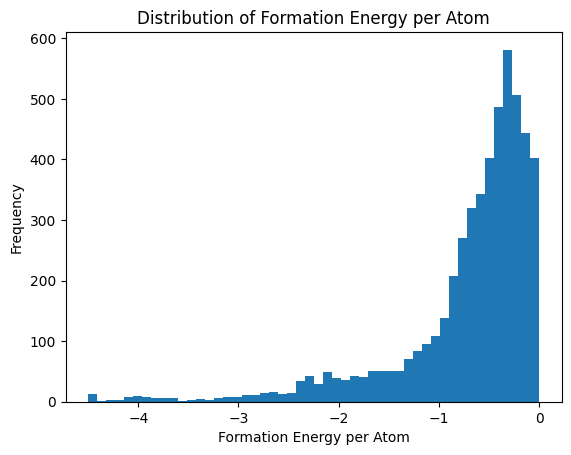

In [ ]:
mp_query['formation_energy_per_atom'].plot(kind='hist', bins=50)
plt.title('Distribution of Formation Energy per Atom')
plt.xlabel('Formation Energy per Atom')
plt.show()


In [ ]:
print('duplicated datas:', mp_query.duplicated().any())

duplicated datas: False


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

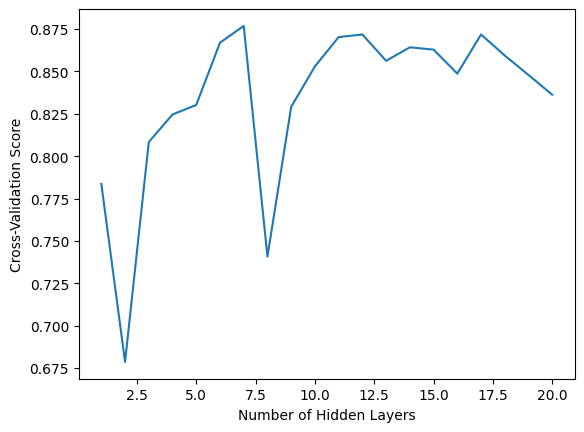

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(x,) for x in range(1, 21)]  # Test 1 to 20 layers
scores = []

for size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=size)
    score = cross_val_score(clf, X, y, cv=5).mean()
    scores.append(score)

plt.plot(range(1, 21), scores)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Cross-Validation Score')
plt.show()


In [ ]:
num_materials = mp_query['material_id'].nunique(dropna=False)
print(num_materials)


5149


Github website:https://github.com/TzuHsiangCho/Final-project-Material-dataframe.git